In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # import tqdm for progress bar 
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
target_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [3]:
main_path = 'data_penyakit/dataset/train'

In [4]:
# Load the images and labels
filename = []
X = []
y = []
for label in target_labels:
    label_dir = os.path.join(main_path, label)
    for img_file in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_file)
        img = load_img(img_path, target_size=(128, 128))
        img_array = img_to_array(img)
        filename.append(img_file)
        X.append(img_array)
        y.append(target_labels.index(label))

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
X = np.array(X)
y = to_categorical(y, num_classes=len(target_labels))

In [7]:
X.shape

(60930, 128, 128, 3)

In [8]:
y.shape

(60930, 33)

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, filename_train, filename_test = train_test_split(X, y, filename, test_size=0.1, random_state=42)

In [10]:
X_train.shape

(54837, 128, 128, 3)

In [11]:
X_test.shape

(6093, 128, 128, 3)

In [12]:
y_train.shape

(54837, 33)

In [13]:
y_test.shape

(6093, 33)

In [14]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import legacy

In [15]:
len(target_labels)

33

In [16]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size= (3,3), activation = 'relu',input_shape=(128,128,3)))
cnn_model.add(MaxPooling2D(pool_size =(2,2,)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(64,kernel_size= (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size =(2,2,)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(64,kernel_size= (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size =(2,2,)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(96,kernel_size= (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size =(2,2,)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32,kernel_size= (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size =(2,2,)))
cnn_model.add(BatchNormalization())

cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(len(target_labels), activation='softmax'))
optimizer = legacy.Adam(learning_rate=0.01)
cnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [17]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                        

In [18]:
# Train the CNN model
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10


2023-06-27 23:40:53.890596: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1714/1714 [==============================] - 315s 183ms/step - loss: 1.3951 - accuracy: 0.5715 - val_loss: 1.1034 - val_accuracy: 0.6442
Epoch 2/10
1714/1714 [==============================] - 342s 199ms/step - loss: 0.7935 - accuracy: 0.7506 - val_loss: 0.7760 - val_accuracy: 0.7555
Epoch 3/10
1714/1714 [==============================] - 341s 199ms/step - loss: 0.6206 - accuracy: 0.8052 - val_loss: 0.6087 - val_accuracy: 0.7999
Epoch 4/10
1714/1714 [==============================] - 351s 205ms/step - loss: 0.5354 - accuracy: 0.8329 - val_loss: 0.5194 - val_accuracy: 0.8465
Epoch 5/10
1714/1714 [==============================] - 354s 206ms/step - loss: 0.4878 - accuracy: 0.8480 - val_loss: 0.3606 - val_accuracy: 0.8907
Epoch 6/10
1714/1714 [==============================] - 355s 207ms/step - loss: 0.4448 - accuracy: 0.8645 - val_loss: 1.7016 - val_accuracy: 0.6722
Epoch 7/10
1714/1714 [==============================] - 352s 206ms/step - loss: 0.4182 - accuracy: 0.8723 - val_loss: 0.351

In [19]:
# save cnn model
cnn_model.save('cnn_model_90_10_lr_0_01_(2).h5')

In [20]:
# Evaluate the performance of the trained CNN model on the test set
cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=0)
print("CNN Model Accuracy: %.2f%%" % (cnn_scores[1] * 100))

CNN Model Accuracy: 85.02%


In [21]:
cnn_scores

[0.5491282343864441, 0.8501558899879456]

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use the model to predict the test dataset
y_pred_prob = cnn_model.predict(X_test)

# Convert probabilities to classes
y_pred = np.argmax(y_pred_prob, axis=1)

# If y_test is one-hot encoded, convert it to classes as well
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred)

# Calculate precision
precision = precision_score(y_test_classes, y_pred, average='weighted') 

# Calculate recall
recall = recall_score(y_test_classes, y_pred, average='weighted') 

# Calculate F1 score
f1 = f1_score(y_test_classes, y_pred, average='weighted')

# Print the metrics
print("CNN Accuracy: %.2f%%" % (accuracy * 100))
print("CNN Precision: %.2f%%" % (precision * 100))
print("CNN Recall: %.2f%%" % (recall * 100))
print("CNN F1 score: %.2f%%" % (f1 * 100))

191/191 [==============================] - 12s 59ms/step
CNN Accuracy: 85.02%
CNN Precision: 89.17%
CNN Recall: 85.02%
CNN F1 score: 85.50%


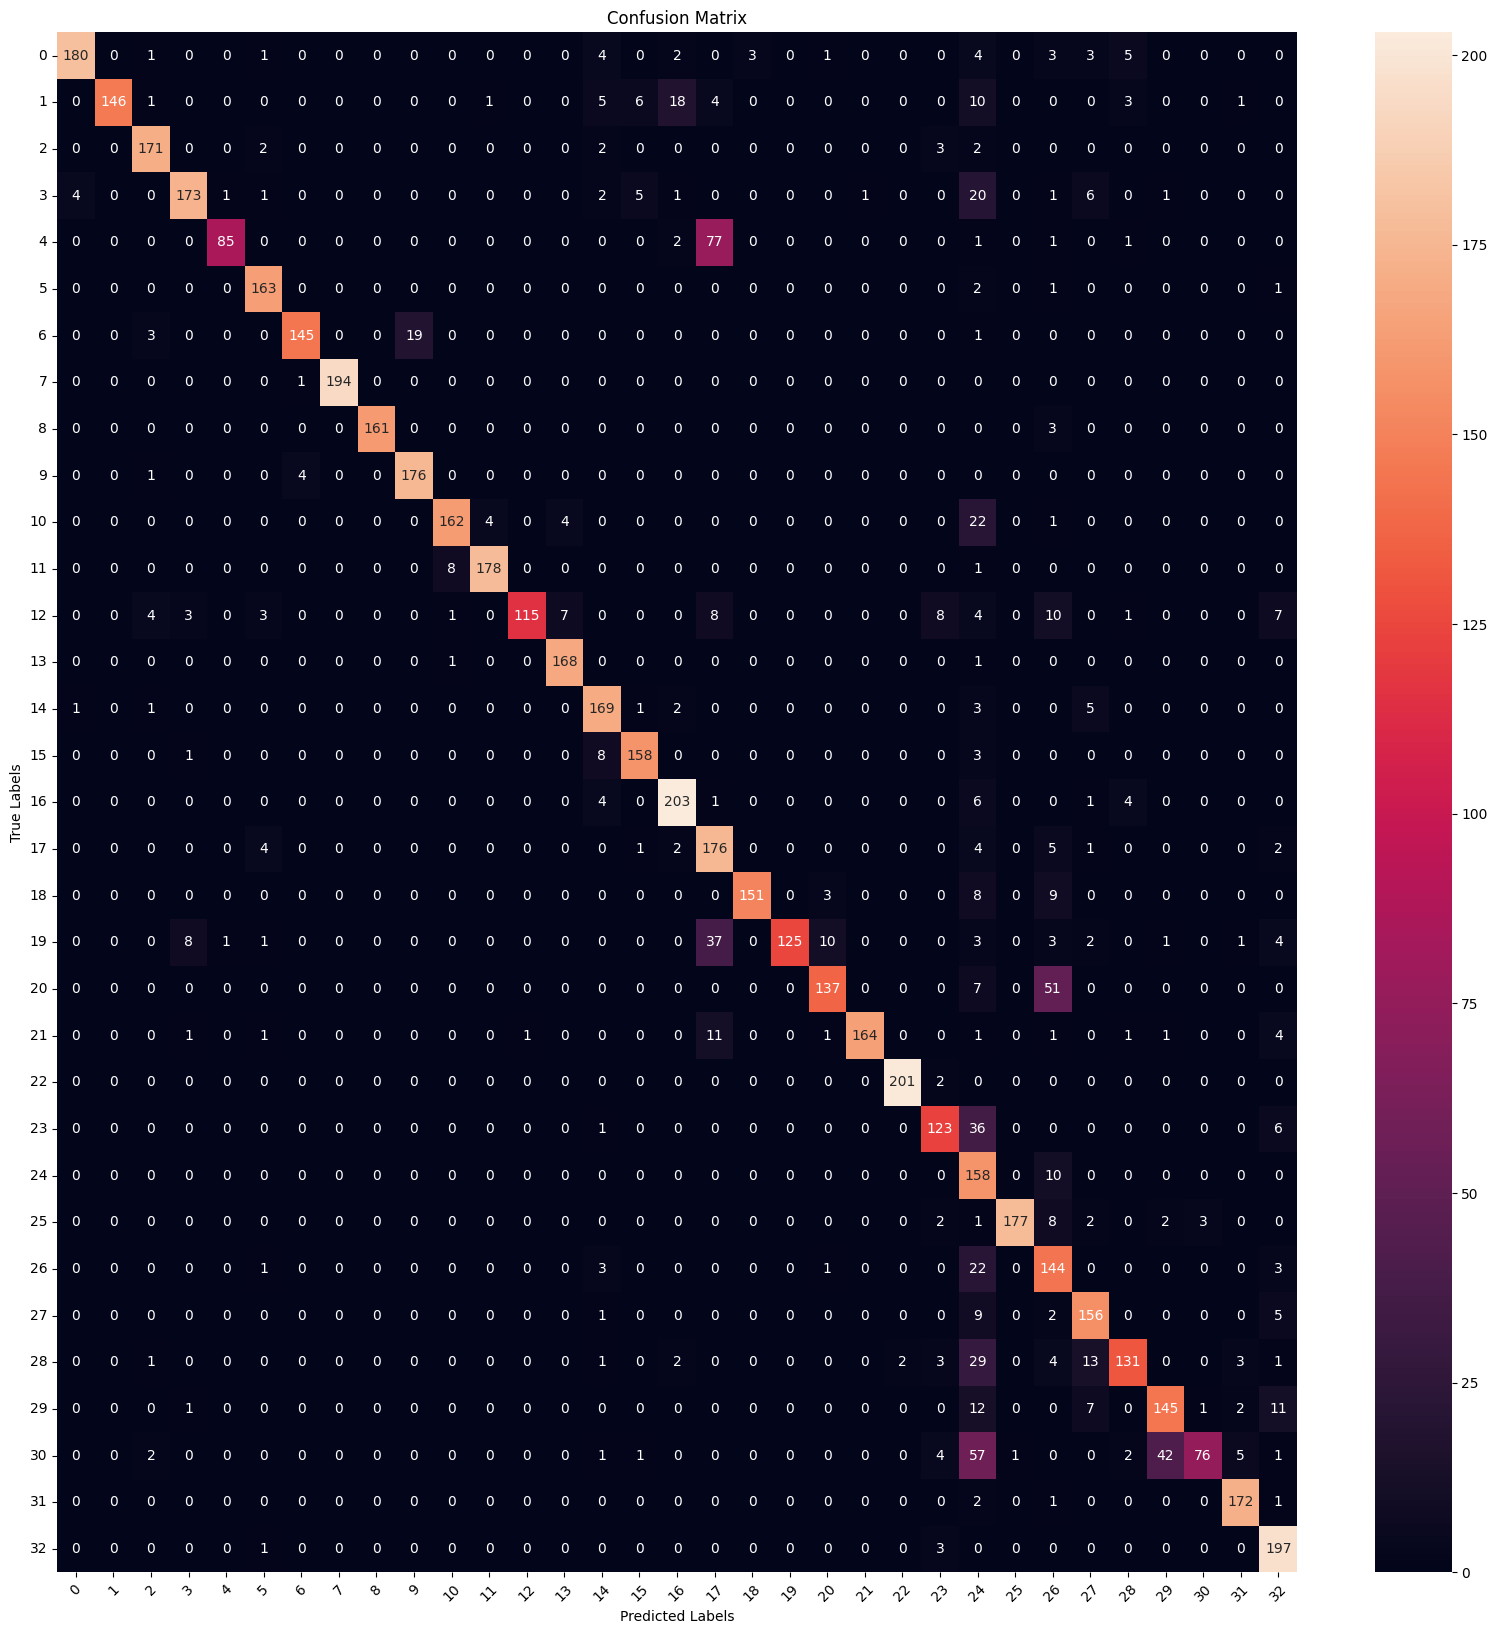

Target Labels:
Index 0: Apple___Apple_scab
Index 1: Apple___Black_rot
Index 2: Apple___Cedar_apple_rust
Index 3: Apple___healthy
Index 4: Cherry_(including_sour)___healthy
Index 5: Cherry_(including_sour)___Powdery_mildew
Index 6: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Index 7: Corn_(maize)___Common_rust_
Index 8: Corn_(maize)___healthy
Index 9: Corn_(maize)___Northern_Leaf_Blight
Index 10: Grape___Black_rot
Index 11: Grape___Esca_(Black_Measles)
Index 12: Grape___healthy
Index 13: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Index 14: Peach___Bacterial_spot
Index 15: Peach___healthy
Index 16: Pepper,_bell___Bacterial_spot
Index 17: Pepper,_bell___healthy
Index 18: Potato___Early_blight
Index 19: Potato___healthy
Index 20: Potato___Late_blight
Index 21: Strawberry___healthy
Index 22: Strawberry___Leaf_scorch
Index 23: Tomato___Bacterial_spot
Index 24: Tomato___Early_blight
Index 25: Tomato___healthy
Index 26: Tomato___Late_blight
Index 27: Tomato___Leaf_Mold
Index 28: Tomato_

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plotting the confusion matrix
confusion_mat_cnn = confusion_matrix(y_test_classes, y_pred)

plt.figure(figsize=(20, 20))
sns.heatmap(confusion_mat_cnn, annot=True, fmt='d', xticklabels=range(len(target_labels)), yticklabels=range(len(target_labels)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Print target labels with index
print("Target Labels:")
for idx, label in enumerate(target_labels):
    print(f"Index {idx}: {label}")

# Print confusion matrix
print("Confusion Matrix:")
for row in confusion_mat_cnn:
    print(" ".join(str(cell).rjust(5) for cell in row))

In [24]:
from tabulate import tabulate

# Create a DataFrame with true labels, predicted labels, and target labels
df = pd.DataFrame({'Filename': filename_test,
                   'True Labels': [target_labels[label] for label in y_test_classes],
                   'Predicted Labels': [target_labels[label] for label in y_pred]})

# Convert DataFrame to tabular format
table = tabulate(df, headers='keys', tablefmt='psql')

# Print the table
print(table)

# Save the DataFrame to a CSV file
df.to_csv('labels_predictions-cnn-semua-jenis_90_10_lr_0_01_(2).csv', index=False)

+------+-----------------------------------------------------------------------------+----------------------------------------------------+----------------------------------------------------+
|      | Filename                                                                    | True Labels                                        | Predicted Labels                                   |
|------+-----------------------------------------------------------------------------+----------------------------------------------------+----------------------------------------------------|
|    0 | db39cf0e-cfe0-49d1-a5ed-5d69faa26507___JR_HL 8756.JPG                       | Pepper,_bell___healthy                             | Pepper,_bell___healthy                             |
|    1 | RS_Rust 2168_flipLR.JPG                                                     | Corn_(maize)___Common_rust_                        | Corn_(maize)___Common_rust_                        |
|    2 | dd9c3ad3-aa94-4d00-88c8-8e

In [25]:
# Filter rows where true label and predicted label do not match
false_predictions = df[df['True Labels'] != df['Predicted Labels']]

# Convert DataFrame to tabular format
table = tabulate(false_predictions, headers='keys', tablefmt='psql')

# Print the false predictions table
print("False Predictions:")
print(table)

# Save the false predictions to a CSV file
false_predictions.to_csv('false_predictions-cnn-semua-jenis_90_10_lr_0_01_(2).csv', index=False)

False Predictions:
+------+-----------------------------------------------------------------------------+----------------------------------------------------+----------------------------------------------------+
|      | Filename                                                                    | True Labels                                        | Predicted Labels                                   |
|------+-----------------------------------------------------------------------------+----------------------------------------------------+----------------------------------------------------|
|    7 | 06412832-90d3-4713-9e82-f2cca52dadc8___GHLB2 Leaf 8734.JPG                  | Tomato___Late_blight                               | Peach___Bacterial_spot                             |
|   12 | 183e009f-456d-45f3-8f1a-efe984123983___JR_HL 4091_180deg.JPG                | Cherry_(including_sour)___healthy                  | Pepper,_bell___healthy                             |
|   16 | 4a7b8d1

# RF

In [26]:
# Extract the features using the trained CNN model
cnn_features = cnn_model.predict(X_train)

1714/1714 [==============================] - 111s 65ms/step


In [27]:
# Convert features to a DataFrame
df = pd.DataFrame(cnn_features)

# Save DataFrame to a CSV file
df.to_csv('cnn_features_semua_jenis_90_10_lr_0_01_(2).csv', index=False)

In [28]:
import time

In [29]:
# import the Random Forest classifier
from RF_Manual import RandomForest

In [30]:
# Train a Random Forest classifier on the extracted features
start_time = time.time()
rf_classifier = RandomForest(n_trees=100, max_depth=42)
rf_classifier.fit(cnn_features, np.argmax(y_train, axis=1))

# count time for training
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 46348.42155432701 seconds


In [31]:
import joblib

# save rf model
joblib.dump(rf_classifier, 'rf_model_90_10_lr_0_01_(2).pkl')

['rf_model_90_10_lr_0_01_(2).pkl']

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the performance of the Random Forest classifier on the test set
rf_features = cnn_model.predict(X_test)
rf_features = rf_features.reshape(rf_features.shape[0], -1)
rf_predictions = rf_classifier.predict(rf_features)

# Calculate and print the Accuracy
rf_accuracy = np.mean(rf_predictions == np.argmax(y_test, axis=1))
print("Random Forest Classifier Accuracy: %.2f%%" % (rf_accuracy * 100))

# Calculate and print the Precision
rf_precision = precision_score(np.argmax(y_test, axis=1), rf_predictions, average='weighted')
print("Random Forest Classifier Precision: %.2f%%" % (rf_precision * 100))

# Calculate and print the Recall
rf_recall = recall_score(np.argmax(y_test, axis=1), rf_predictions, average='weighted')
print("Random Forest Classifier Recall: %.2f%%" % (rf_recall * 100))

# Calculate and print the F1 score
rf_f1_score = f1_score(np.argmax(y_test, axis=1), rf_predictions, average='weighted')
print("Random Forest Classifier F1 Score: %.2f%%" % (rf_f1_score * 100))

191/191 [==============================] - 9s 44ms/step
Random Forest Classifier Accuracy: 94.30%
Random Forest Classifier Precision: 94.50%
Random Forest Classifier Recall: 94.30%
Random Forest Classifier F1 Score: 94.35%


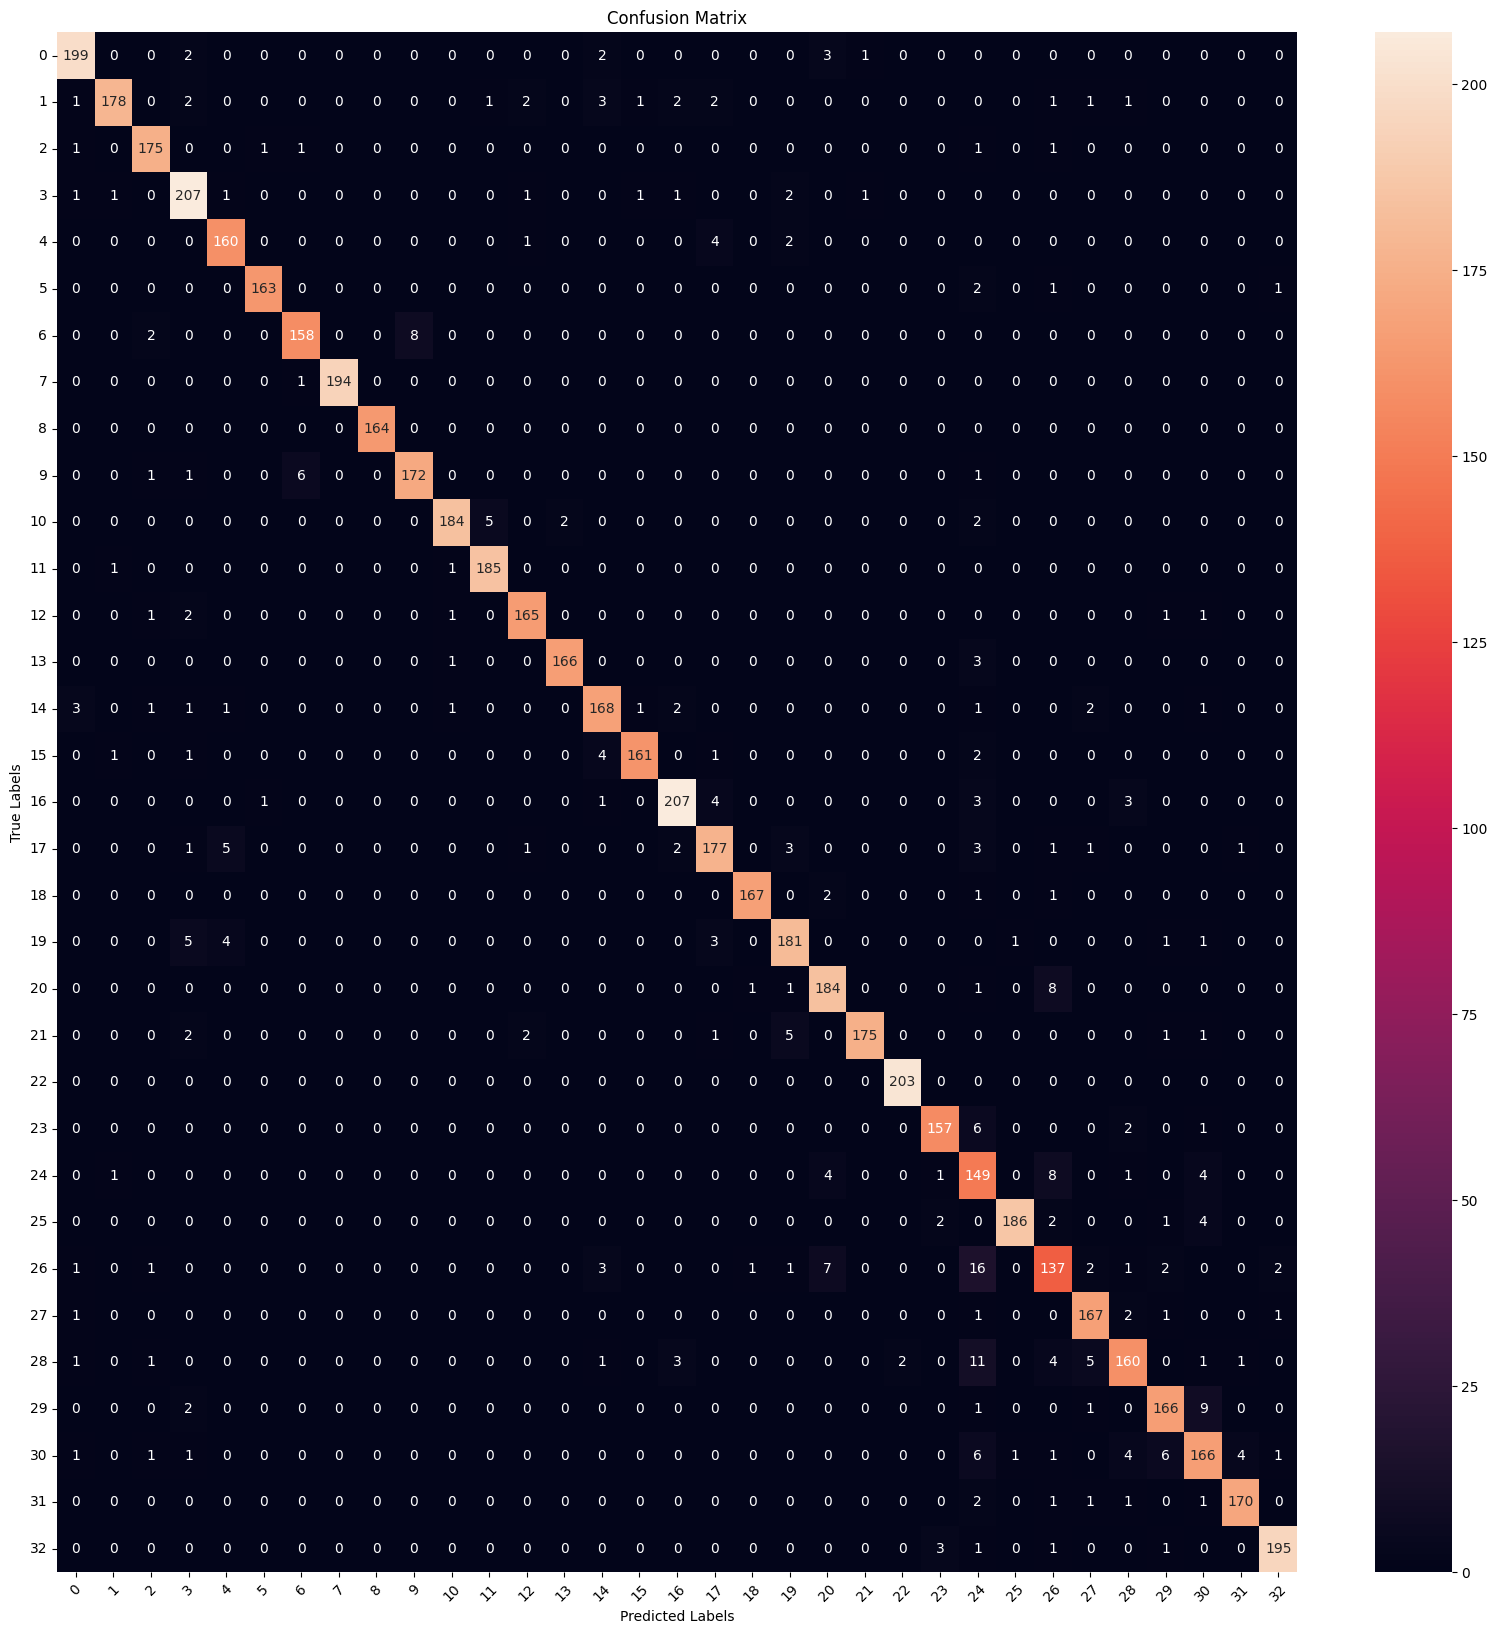

Target Labels:
Index 0: Apple___Apple_scab
Index 1: Apple___Black_rot
Index 2: Apple___Cedar_apple_rust
Index 3: Apple___healthy
Index 4: Cherry_(including_sour)___healthy
Index 5: Cherry_(including_sour)___Powdery_mildew
Index 6: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Index 7: Corn_(maize)___Common_rust_
Index 8: Corn_(maize)___healthy
Index 9: Corn_(maize)___Northern_Leaf_Blight
Index 10: Grape___Black_rot
Index 11: Grape___Esca_(Black_Measles)
Index 12: Grape___healthy
Index 13: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Index 14: Peach___Bacterial_spot
Index 15: Peach___healthy
Index 16: Pepper,_bell___Bacterial_spot
Index 17: Pepper,_bell___healthy
Index 18: Potato___Early_blight
Index 19: Potato___healthy
Index 20: Potato___Late_blight
Index 21: Strawberry___healthy
Index 22: Strawberry___Leaf_scorch
Index 23: Tomato___Bacterial_spot
Index 24: Tomato___Early_blight
Index 25: Tomato___healthy
Index 26: Tomato___Late_blight
Index 27: Tomato___Leaf_Mold
Index 28: Tomato_

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), rf_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(20, 20))  # Increase the figure size
sns.heatmap(confusion_mat, annot=True, fmt='d', xticklabels=range(len(target_labels)), yticklabels=range(len(target_labels)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Rotate y-axis labels for better visibility
plt.show()

# Print target labels with index
print("Target Labels:")
for idx, label in enumerate(target_labels):
    print(f"Index {idx}: {label}")

# Print matrix with larger font size
print("Confusion Matrix:")
for row in confusion_mat:
    print(" ".join(str(cell).rjust(5) for cell in row))

In [34]:
# Convert rf return to a DataFrame
df = pd.DataFrame(rf_predictions)

# Save DataFrame to a CSV file
df.to_csv('rf_return_semua_jenis_90_10_0_01_(2).csv', index=False)

In [35]:
# Create a DataFrame with true labels and predicted labels
df_rf = pd.DataFrame({'Filename': filename_test,
                      'True Labels': [target_labels[label] for label in y_test_classes],
                      'Predicted Labels': [target_labels[label] for label in rf_predictions]})

# Convert DataFrame to tabular format
table_rf = tabulate(df_rf, headers='keys', tablefmt='psql')

# Print the table
print(table_rf)

# Save the DataFrame to a CSV file
df_rf.to_csv('labels_predictions-rf-semua-jenis_90_10_lr_0_01_(2).csv', index=False)

+------+-----------------------------------------------------------------------------+----------------------------------------------------+----------------------------------------------------+
|      | Filename                                                                    | True Labels                                        | Predicted Labels                                   |
|------+-----------------------------------------------------------------------------+----------------------------------------------------+----------------------------------------------------|
|    0 | db39cf0e-cfe0-49d1-a5ed-5d69faa26507___JR_HL 8756.JPG                       | Pepper,_bell___healthy                             | Pepper,_bell___healthy                             |
|    1 | RS_Rust 2168_flipLR.JPG                                                     | Corn_(maize)___Common_rust_                        | Corn_(maize)___Common_rust_                        |
|    2 | dd9c3ad3-aa94-4d00-88c8-8e

In [36]:
# Filter rows where true label and predicted label do not match
false_predictions_rf = df_rf[df_rf['True Labels'] != df_rf['Predicted Labels']]

# Convert DataFrame to tabular format
table_rf = tabulate(false_predictions_rf, headers='keys', tablefmt='psql')

# Print the false predictions table
print("False Predictions:")
print(table_rf)

# Save the false predictions to a CSV file
false_predictions_rf.to_csv('false_predictions-rf-semua-jenis_90_10_lr_0_01_(2).csv', index=False)

False Predictions:
+------+-----------------------------------------------------------------------------+----------------------------------------------------+----------------------------------------------------+
|      | Filename                                                                    | True Labels                                        | Predicted Labels                                   |
|------+-----------------------------------------------------------------------------+----------------------------------------------------+----------------------------------------------------|
|    7 | 06412832-90d3-4713-9e82-f2cca52dadc8___GHLB2 Leaf 8734.JPG                  | Tomato___Late_blight                               | Peach___Bacterial_spot                             |
|   12 | 183e009f-456d-45f3-8f1a-efe984123983___JR_HL 4091_180deg.JPG                | Cherry_(including_sour)___healthy                  | Pepper,_bell___healthy                             |
|   16 | 4a7b8d1